In [ ]:
pip install librosa scipy

In [ ]:
pip install pysptk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.3/421.3 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-0.2.2-cp310-cp310-linux_x86_64.whl size=1235505 sha256=eb75f37c44eb633bc38958cc72eebfd83af2ff6cf7b8b54eccac72abdfbc7d35
  Stored in directory: /root/.cache/pip/wheels/87/ef/11/e708873d0361690e25e06ccfd1d793ff4549a91bb48ee58ca3
Successfully built pysptk


In [ ]:
pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 21.2 MB/s eta 0:00:00


In [ ]:
import librosa
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


In [ ]:
drive_path = "/content/drive/Shareddrives/CS298/CS 297/EMOV"

In [ ]:
folders = os.listdir(drive_path)

# Print the names of the folders
for folder in folders:
    print(folder)

bea_Sleepy
bea_Amused
bea_Disgusted
bea_Angry
bea_Neutral
jenie_Sleepy
jenie_Disgusted
josh_Neutral
josh_Amused
josh_Sleepy
jenie_Neutral
jenie_Amused
jenie_Angry
sam_Disgusted
sam_Amused
sam_Sleepy
sam_Neutral
sam_Angry


In [ ]:
import os
import pandas as pd

# Initialize lists to store data
audio_paths = []
emotions = []

# Iterate through each folder
for folder in os.listdir(drive_path):
    folder_path = os.path.join(drive_path, folder)
    if os.path.isdir(folder_path):
        # Get the emotion category from the folder name
        if "Sleepy" in folder:
            emotion = "Sleepy"
        elif "Amused" in folder:
            emotion = "Amused"
        elif "Disgusted" in folder:
            emotion = "Disgusted"
        elif "Angry" in folder:
            emotion = "Angry"
        elif "Neutral" in folder:
            emotion = "Neutral"
        else:
            emotion = "Unknown"

        # Iterate through audio files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".wav"):
                audio_paths.append(os.path.join(folder_path, file_name))
                emotions.append(emotion)

# Create a DataFrame
data = {"audio_path": audio_paths, "emotion": emotions}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                             audio_path emotion
0     /content/drive/Shareddrives/CS298/CS 297/EMOV/...  Sleepy
1     /content/drive/Shareddrives/CS298/CS 297/EMOV/...  Sleepy
2     /content/drive/Shareddrives/CS298/CS 297/EMOV/...  Sleepy
3     /content/drive/Shareddrives/CS298/CS 297/EMOV/...  Sleepy
4     /content/drive/Shareddrives/CS298/CS 297/EMOV/...  Sleepy
...                                                 ...     ...
6888  /content/drive/Shareddrives/CS298/CS 297/EMOV/...   Angry
6889  /content/drive/Shareddrives/CS298/CS 297/EMOV/...   Angry
6890  /content/drive/Shareddrives/CS298/CS 297/EMOV/...   Angry
6891  /content/drive/Shareddrives/CS298/CS 297/EMOV/...   Angry
6892  /content/drive/Shareddrives/CS298/CS 297/EMOV/...   Angry

[6893 rows x 2 columns]


In [ ]:
def get_audio_properties(audio_path):
    y, sr = librosa.load(audio_path, sr=None, mono=False)
    channels = 1 if y.ndim == 1 else y.shape[0]
    return sr, channels

In [ ]:
audio_path = df['audio_path'][0]
sample_rate, num_channels = get_audio_properties(audio_path)
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Channels: {num_channels}")

Sample Rate: 44100 Hz
Number of Channels: 1


In [ ]:
import librosa
import numpy as np
import scipy
from scipy.signal import lfilter, hamming
import pysptk
from scipy.io import wavfile

def extract_extended_features(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=16000, mono=True)

    # Features dictionary
    features = {}

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45)
    for i, mfcc in enumerate(mfccs):
        features[f'MFCC_{i}'] = np.mean(mfcc)

    # Pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitches[pitches > 0])
    pitch_std = np.std(pitches[pitches > 0])
    features['Pitch_mean'] = pitch_mean
    features['Pitch_std'] = pitch_std

    # Energy
    rmse = librosa.feature.rms(y=y)
    features['Energy_mean'] = np.mean(rmse)
    features['Energy_std'] = np.std(rmse)

    # Spectral Centroid
    spec_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['Spectral_Centroid_mean'] = np.mean(spec_centroids)
    features['Spectral_Centroid_std'] = np.std(spec_centroids)

    # Spectral Bandwidth, Rolloff, RMS Energy
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features['Spectral_Bandwidth_Mean'] = np.mean(spectral_bandwidth)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['Spectral_Rolloff_Mean'] = np.mean(rolloff)
    rms_energy = librosa.feature.rms(y=y)
    features['RMS_Energy_Mean'] = np.mean(rms_energy)

    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    for i, chroma in enumerate(chroma_stft):
        features[f'Chroma{i}'] = np.mean(chroma)

    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    features['ZCR_mean'] = np.mean(zcr)
    features['ZCR_std'] = np.std(zcr)

    # Loudness (using Energy)
    S, phase = librosa.magphase(librosa.stft(y))
    rms_s = librosa.feature.rms(S=S)
    features['Loudness'] = np.mean(librosa.amplitude_to_db(rms_s, ref=np.max))

    # Mel-Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    features['Mel_Spec_Mean'] = np.mean(mel_spec)

    lpc_coefficients = librosa.lpc(y, order=10)
    for i, coeff in enumerate(lpc_coefficients):
        features[f'LPC_{i}'] = coeff

    return features


In [ ]:
x = extract_extended_features(df['audio_path'][0])

In [ ]:
import time
import pandas as pd
i=0
features_list = []

for index, row in df.iterrows():
    # Extract features from the audio utterance path
    features = extract_extended_features(row['audio_path'])
    features['emotion'] = row['emotion']
    features_list.append(features)
    i+=1
    print(i)

In [ ]:
df = pd.DataFrame(features_list)
df.to_csv("features.csv", index=False)

In [ ]:
df.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_2,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,emotion
0,-199.278381,59.844654,10.386721,17.791653,6.660565,13.535763,-0.310329,15.153869,-2.545424,0.620775,...,-0.256231,-0.446423,0.066103,0.173929,-0.051685,0.045090,-0.034829,0.004809,0.154132,Sleepy
1,-216.043152,88.602066,12.959702,20.825836,2.324361,13.473891,4.239889,9.598440,-4.521122,-1.174333,...,0.266330,-0.270365,0.521776,-0.394838,0.041578,0.234308,-0.127933,-0.016188,0.052431,Sleepy
2,-206.555908,73.058136,7.745970,23.519175,-0.017316,17.436249,-1.568495,10.893340,-1.324209,-10.533032,...,0.143754,-0.261154,0.031493,0.377954,-0.158212,0.040634,0.019899,-0.263143,0.221833,Sleepy
3,-233.084793,96.010162,-2.668948,14.374369,6.552032,15.292768,-4.709707,5.522383,-0.102289,0.644405,...,0.130327,-0.099264,0.576669,-0.084405,-0.246575,0.117482,-0.010563,-0.086046,0.073509,Sleepy
4,-315.278320,78.590454,-6.198496,4.791128,10.029104,10.696859,-3.001998,-3.169873,-2.043864,-0.301647,...,0.486604,0.262229,-0.227303,0.286397,-0.197423,-0.075056,0.123683,-0.131601,0.135081,Sleepy


In [ ]:
unique_values_count = df['emotion'].value_counts()
print("Number of unique values in the 'Emotion' column:", unique_values_count)

Number of unique values in the 'Emotion' column: emotion
Sleepy       1721
Neutral      1568
Amused       1317
Angry        1268
Disgusted    1019
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

X = df.iloc[:, :81]
y = df['emotion']

In [ ]:
X.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_1,LPC_2,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10
0,-199.278381,59.844654,10.386721,17.791653,6.660565,13.535763,-0.310329,15.153869,-2.545424,0.620775,...,-0.464144,-0.256231,-0.446423,0.066103,0.173929,-0.051685,0.045090,-0.034829,0.004809,0.154132
1,-216.043152,88.602066,12.959702,20.825836,2.324361,13.473891,4.239889,9.598440,-4.521122,-1.174333,...,-1.217478,0.266330,-0.270365,0.521776,-0.394838,0.041578,0.234308,-0.127933,-0.016188,0.052431
2,-206.555908,73.058136,7.745970,23.519175,-0.017316,17.436249,-1.568495,10.893340,-1.324209,-10.533032,...,-1.044702,0.143754,-0.261154,0.031493,0.377954,-0.158212,0.040634,0.019899,-0.263143,0.221833
3,-233.084793,96.010162,-2.668948,14.374369,6.552032,15.292768,-4.709707,5.522383,-0.102289,0.644405,...,-1.256958,0.130327,-0.099264,0.576669,-0.084405,-0.246575,0.117482,-0.010563,-0.086046,0.073509
4,-315.278320,78.590454,-6.198496,4.791128,10.029104,10.696859,-3.001998,-3.169873,-2.043864,-0.301647,...,-1.516490,0.486604,0.262229,-0.227303,0.286397,-0.197423,-0.075056,0.123683,-0.131601,0.135081


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)

# Reshape input for LSTM layers
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [1]:

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(y_categorical.shape[1], activation='softmax'))
optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10
61/61 [==============================] - 13s 45ms/step - loss: 1.0142 - accuracy: 0.6865 - val_loss: 0.5506 - val_accuracy: 0.8166
Epoch 2/10
61/61 [==============================] - 1s 16ms/step - loss: 0.3392 - accuracy: 0.8904 - val_loss: 0.2597 - val_accuracy: 0.9150
Epoch 3/10
61/61 [==============================] - 1s 17ms/step - loss: 0.1655 - accuracy: 0.9479 - val_loss: 0.1776 - val_accuracy: 0.9409
Epoch 4/10
61/61 [==============================] - 1s 16ms/step - loss: 0.1071 - accuracy: 0.9679 - val_loss: 0.1523 - val_accuracy: 0.9513
Epoch 5/10
61/61 [==============================] - 1s 17ms/step - loss: 0.0762 - accuracy: 0.9754 - val_loss: 0.1376 - val_accuracy: 0.9565
Epoch 6/10
61/61 [==============================] - 2s 31ms/step - loss: 0.0550 - accuracy: 0.9837 - val_loss: 0.1350 - val_accuracy: 0.9585
Epoch 7/10
61/61 [==============================] - 2s 31ms/step - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.1349 - val_accuracy: 0.9554
Epoch 8/10
6

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test accuracy: {accuracy*100:.2f}%')

Test accuracy: 97.00%


In [ ]:
from sklearn.metrics import f1_score
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='macro')

print(f'F1 Score: {f1:.4f}')

65/65 [==============================] - 0s 5ms/step
F1 Score: 0.9681


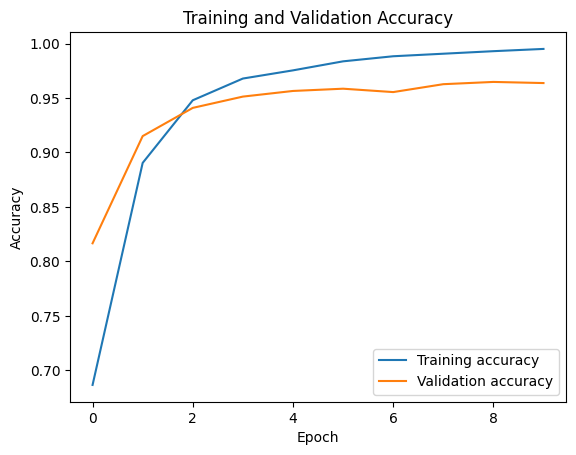

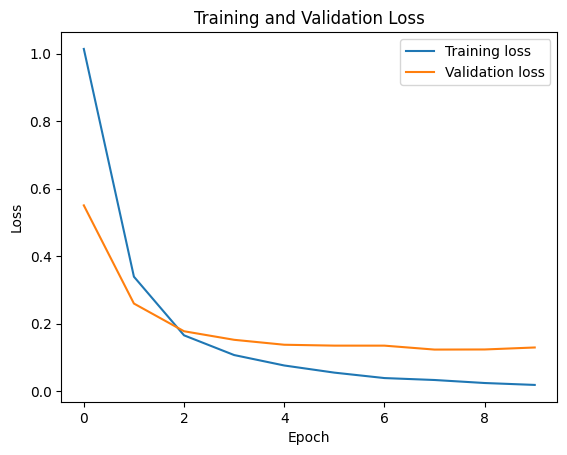

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

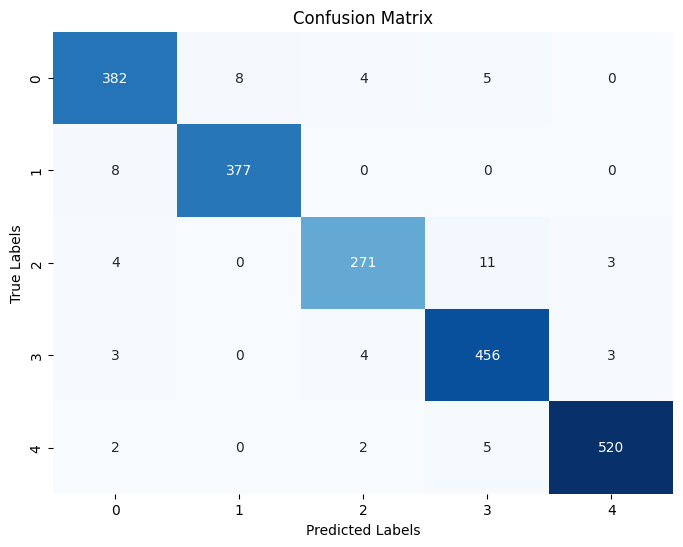

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       399
           1       0.98      0.98      0.98       385
           2       0.96      0.94      0.95       289
           3       0.96      0.98      0.97       466
           4       0.99      0.98      0.99       529

    accuracy                           0.97      2068
   macro avg       0.97      0.97      0.97      2068
weighted avg       0.97      0.97      0.97      2068

